In [1]:


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ADNz1BUslid9Sj5eZpuZ")
project = rf.workspace("roboflow-universe-projects").project("safety-vests")
version = project.version(14)
dataset = version.download("yolov8")
                


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 76.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Safety-Vests-14 in yolov8:: 100%|██████████| 29630/29630 [00:02<00:00, 10681.13it/s]


In [2]:
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)

text = """names:
  - no_safety_vest
  - safety_vest

nc: 2

train: /kaggle/working/Safety-Vests-14/train/images
val: /kaggle/working/Safety-Vests-14/valid/images
test: /kaggle/working/Safety-Vests-14/test/images
"""

write_text_to_file(text, "output.yaml")


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.8.0+cpu CPU (AMD EPYC 7B13)
Setup complete ✅ (224 CPUs, 377.8 GB RAM, 6567.0/8062.4 GB disk)


In [4]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task=detect mode=train data=/kaggle/working/output.yaml model=yolov8n.pt epochs=3 imgsz=640 batch=16

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.8.0+cpu CPU (AMD EPYC 7B13)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/output.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

In [5]:
from IPython.display import Image, display

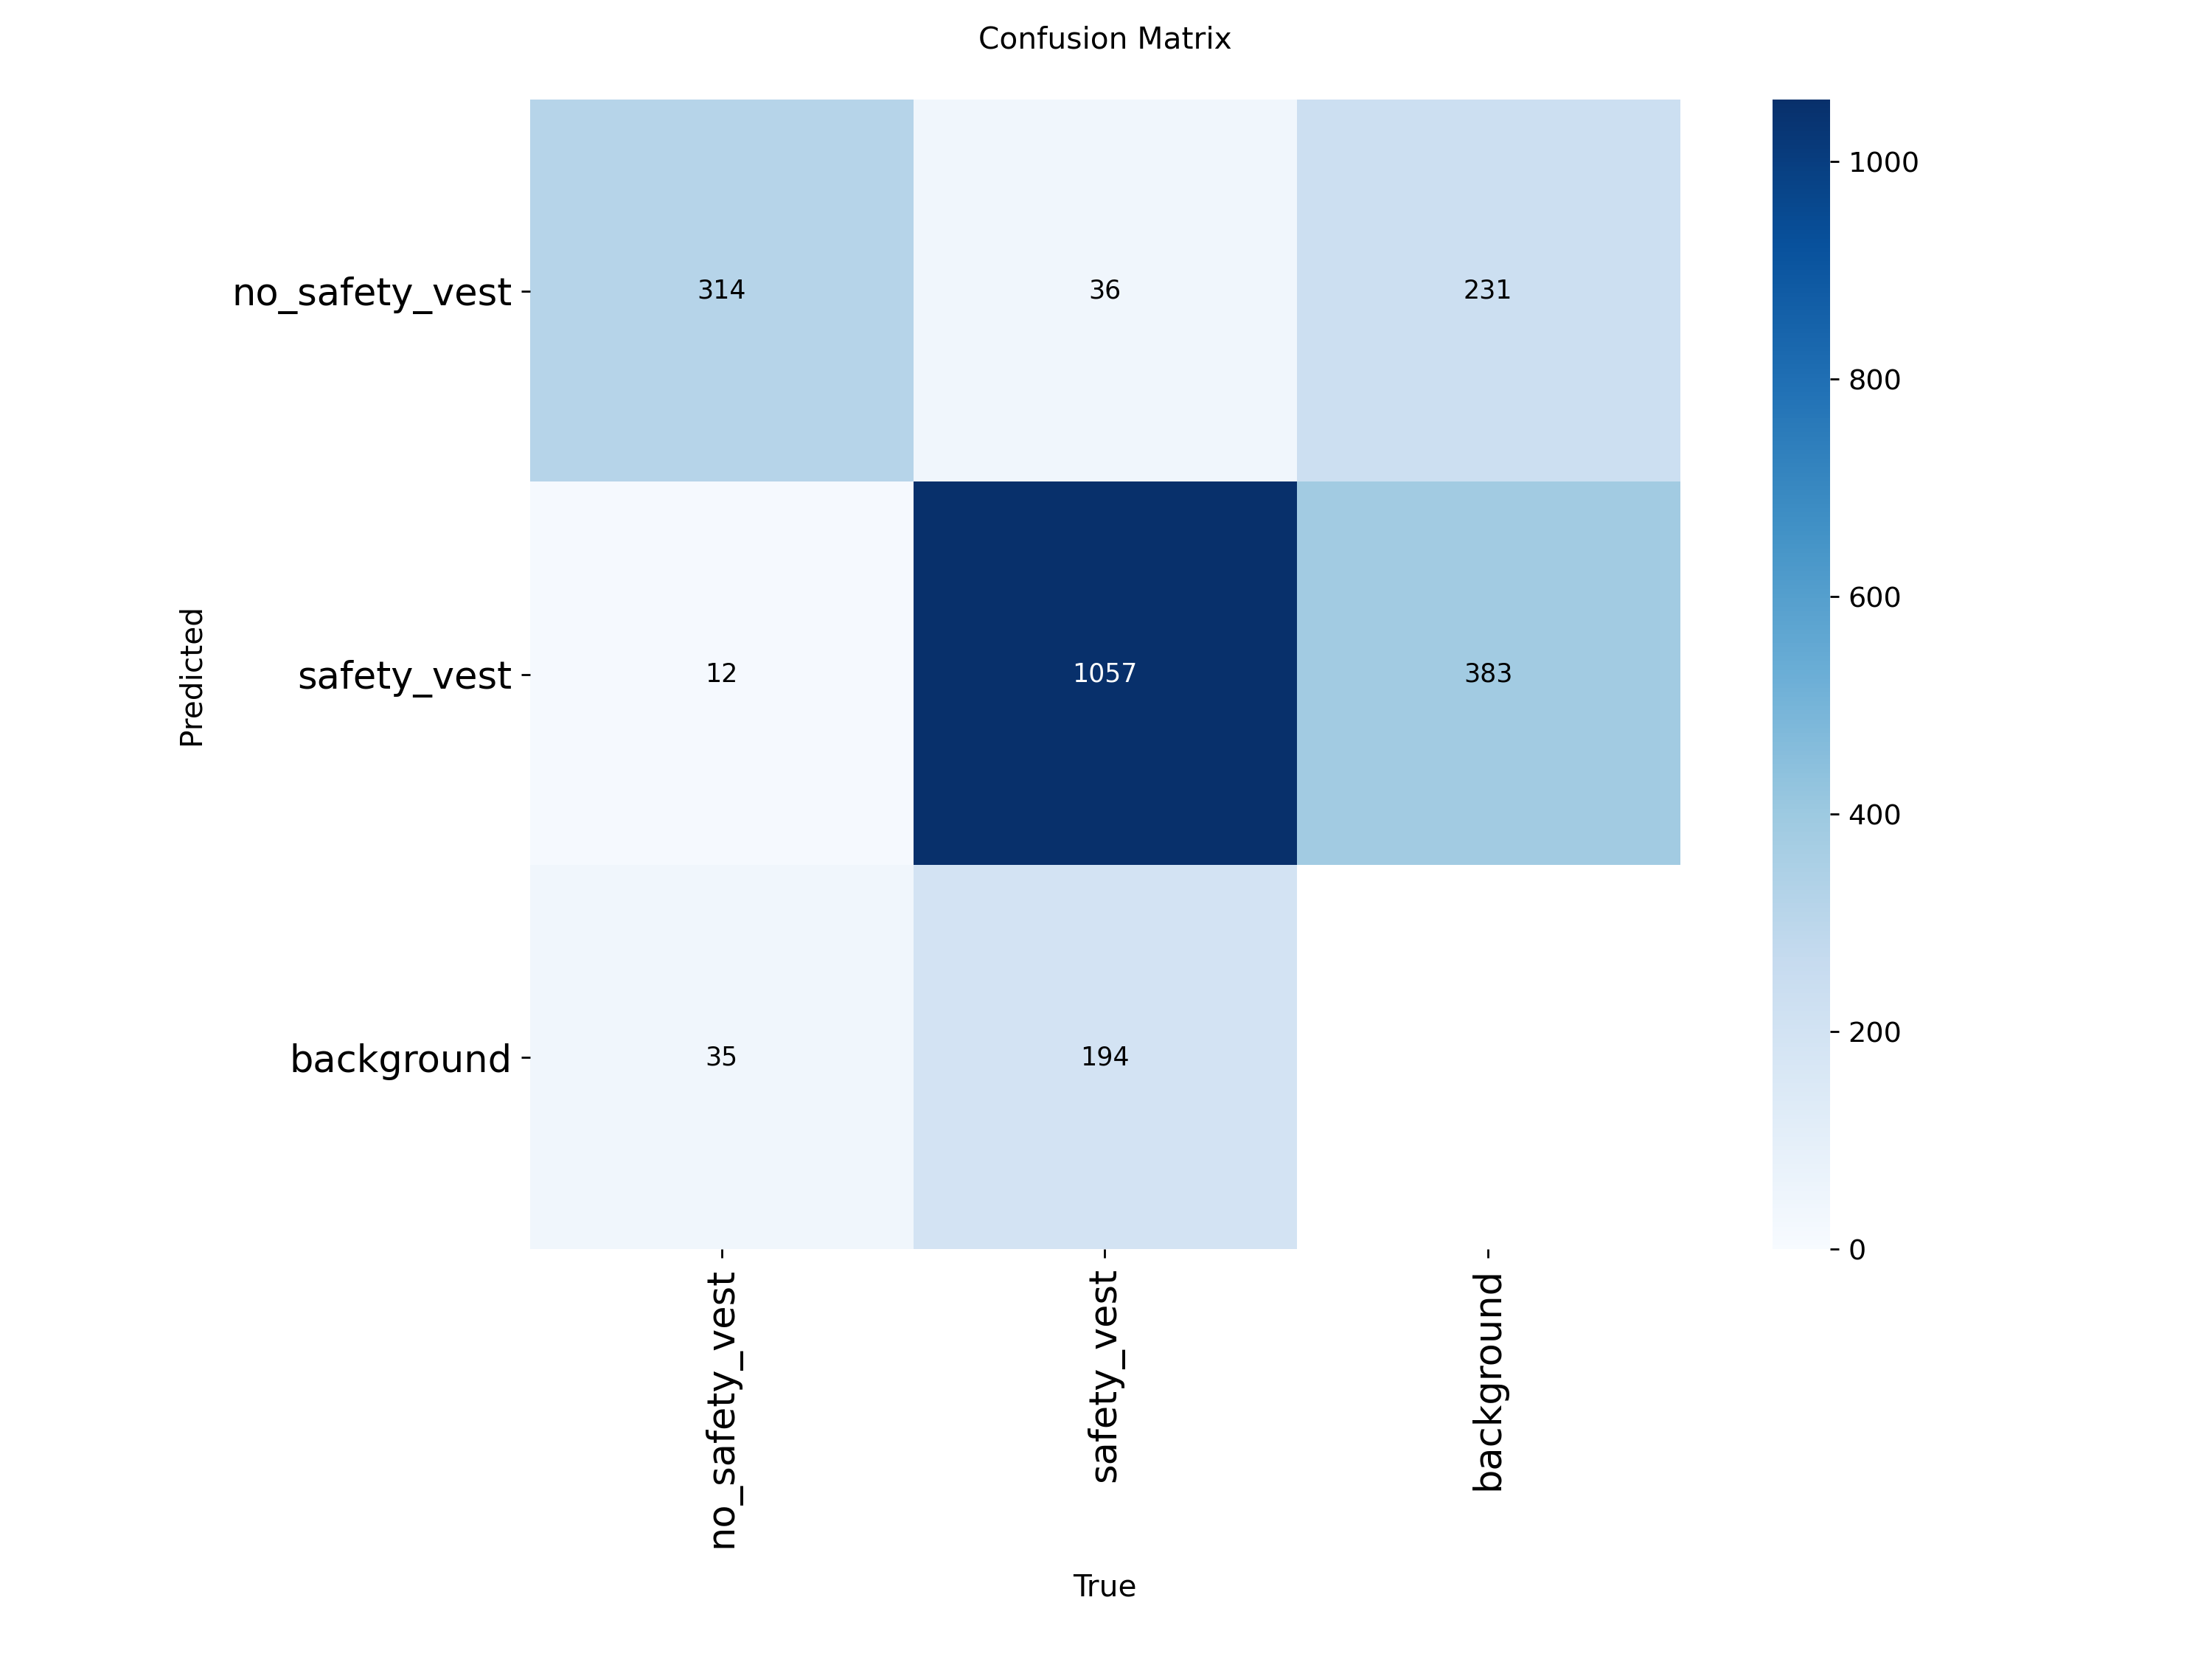

In [6]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

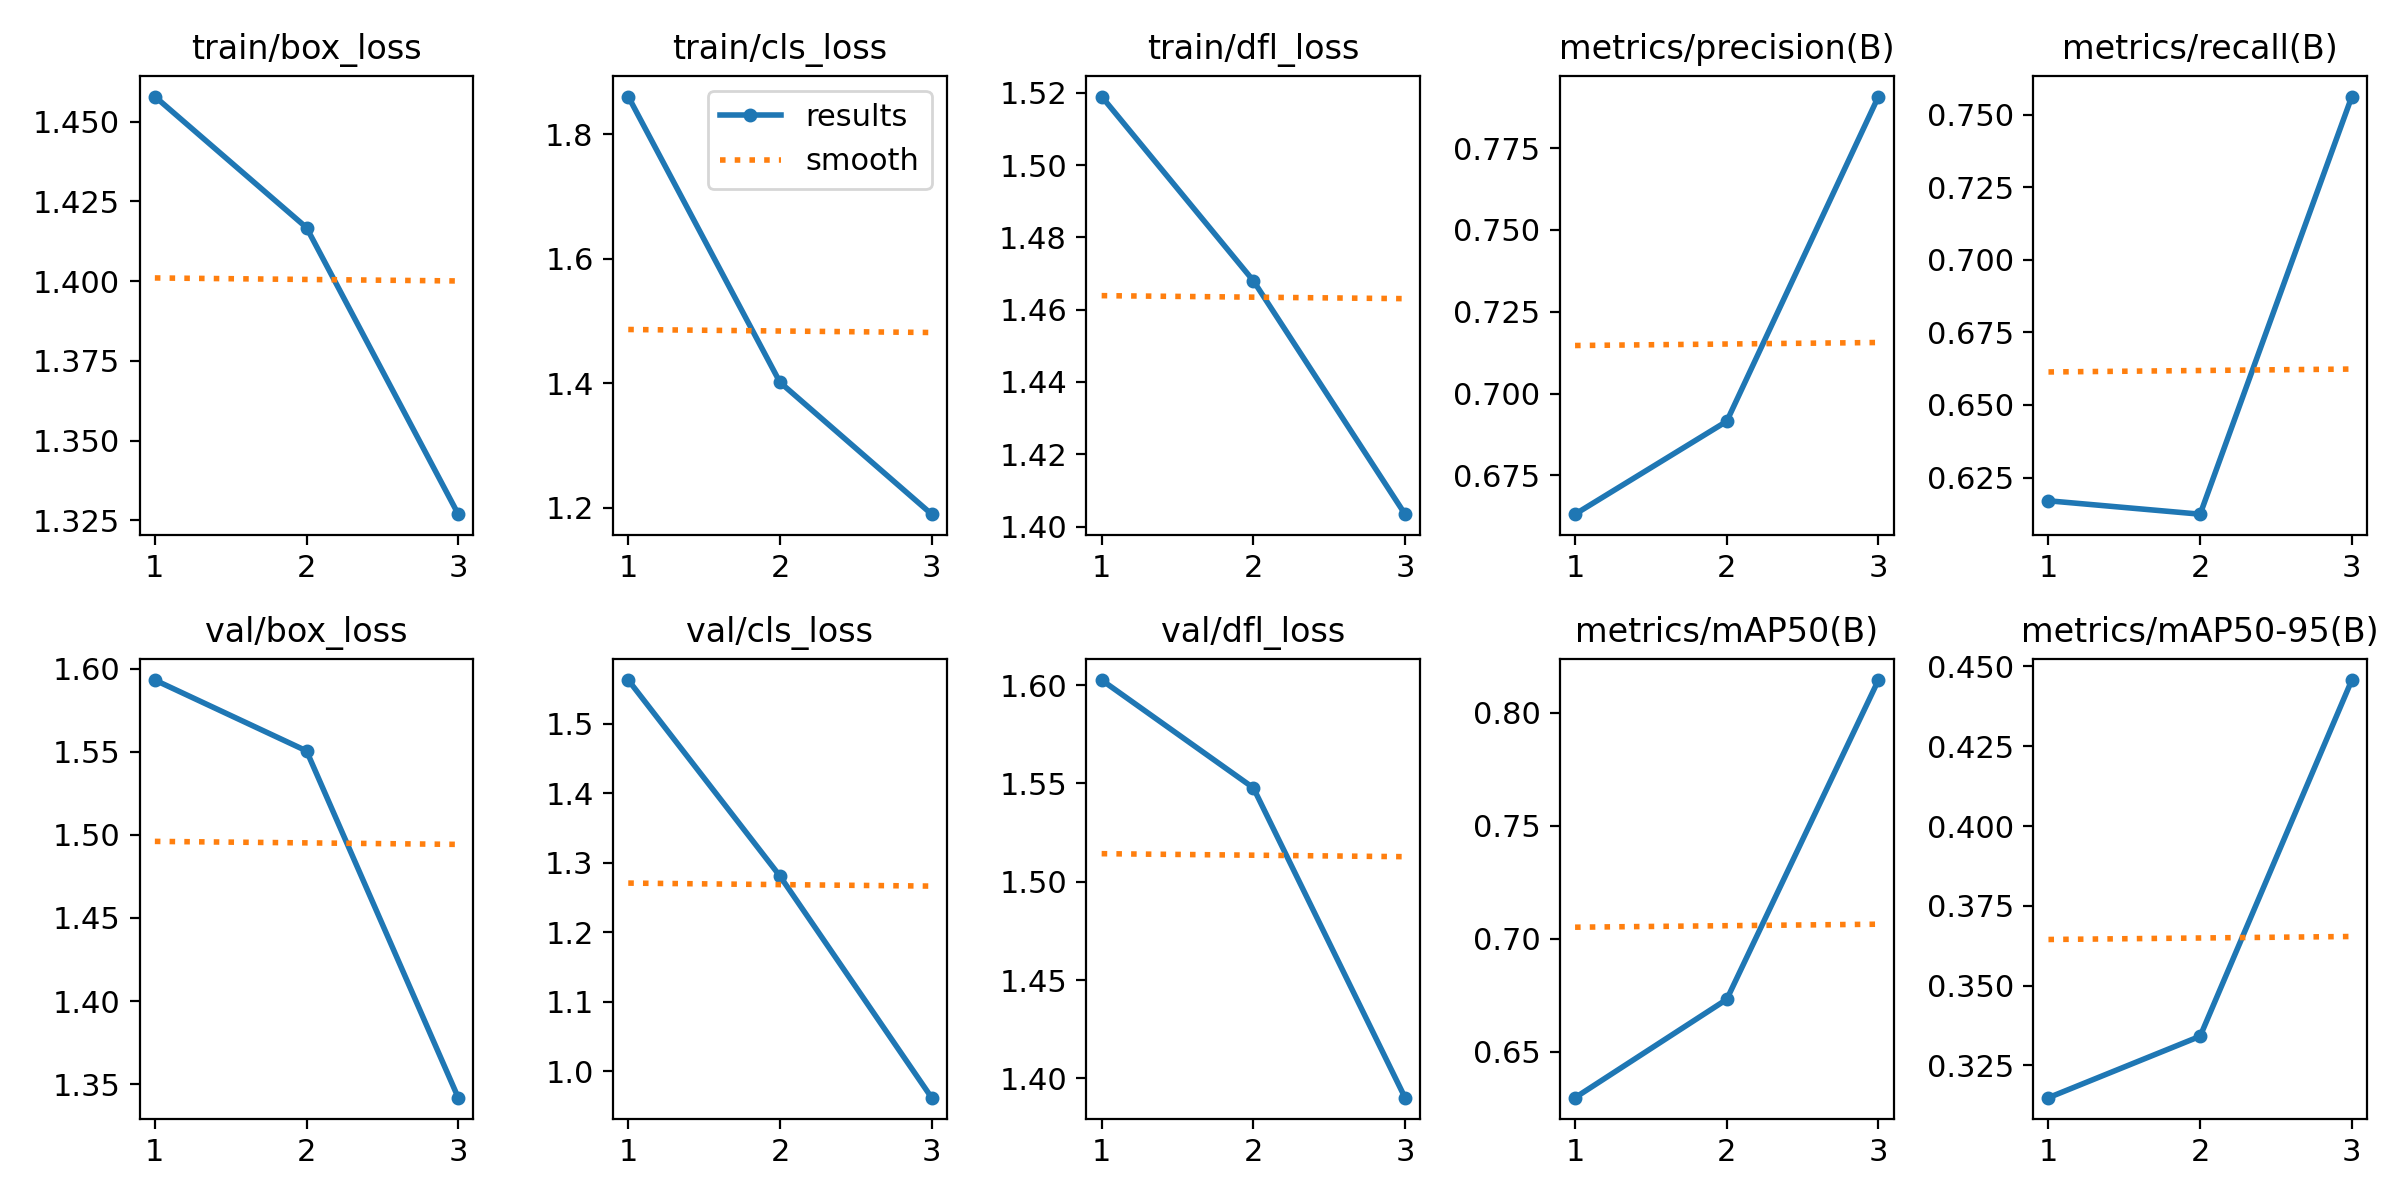

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

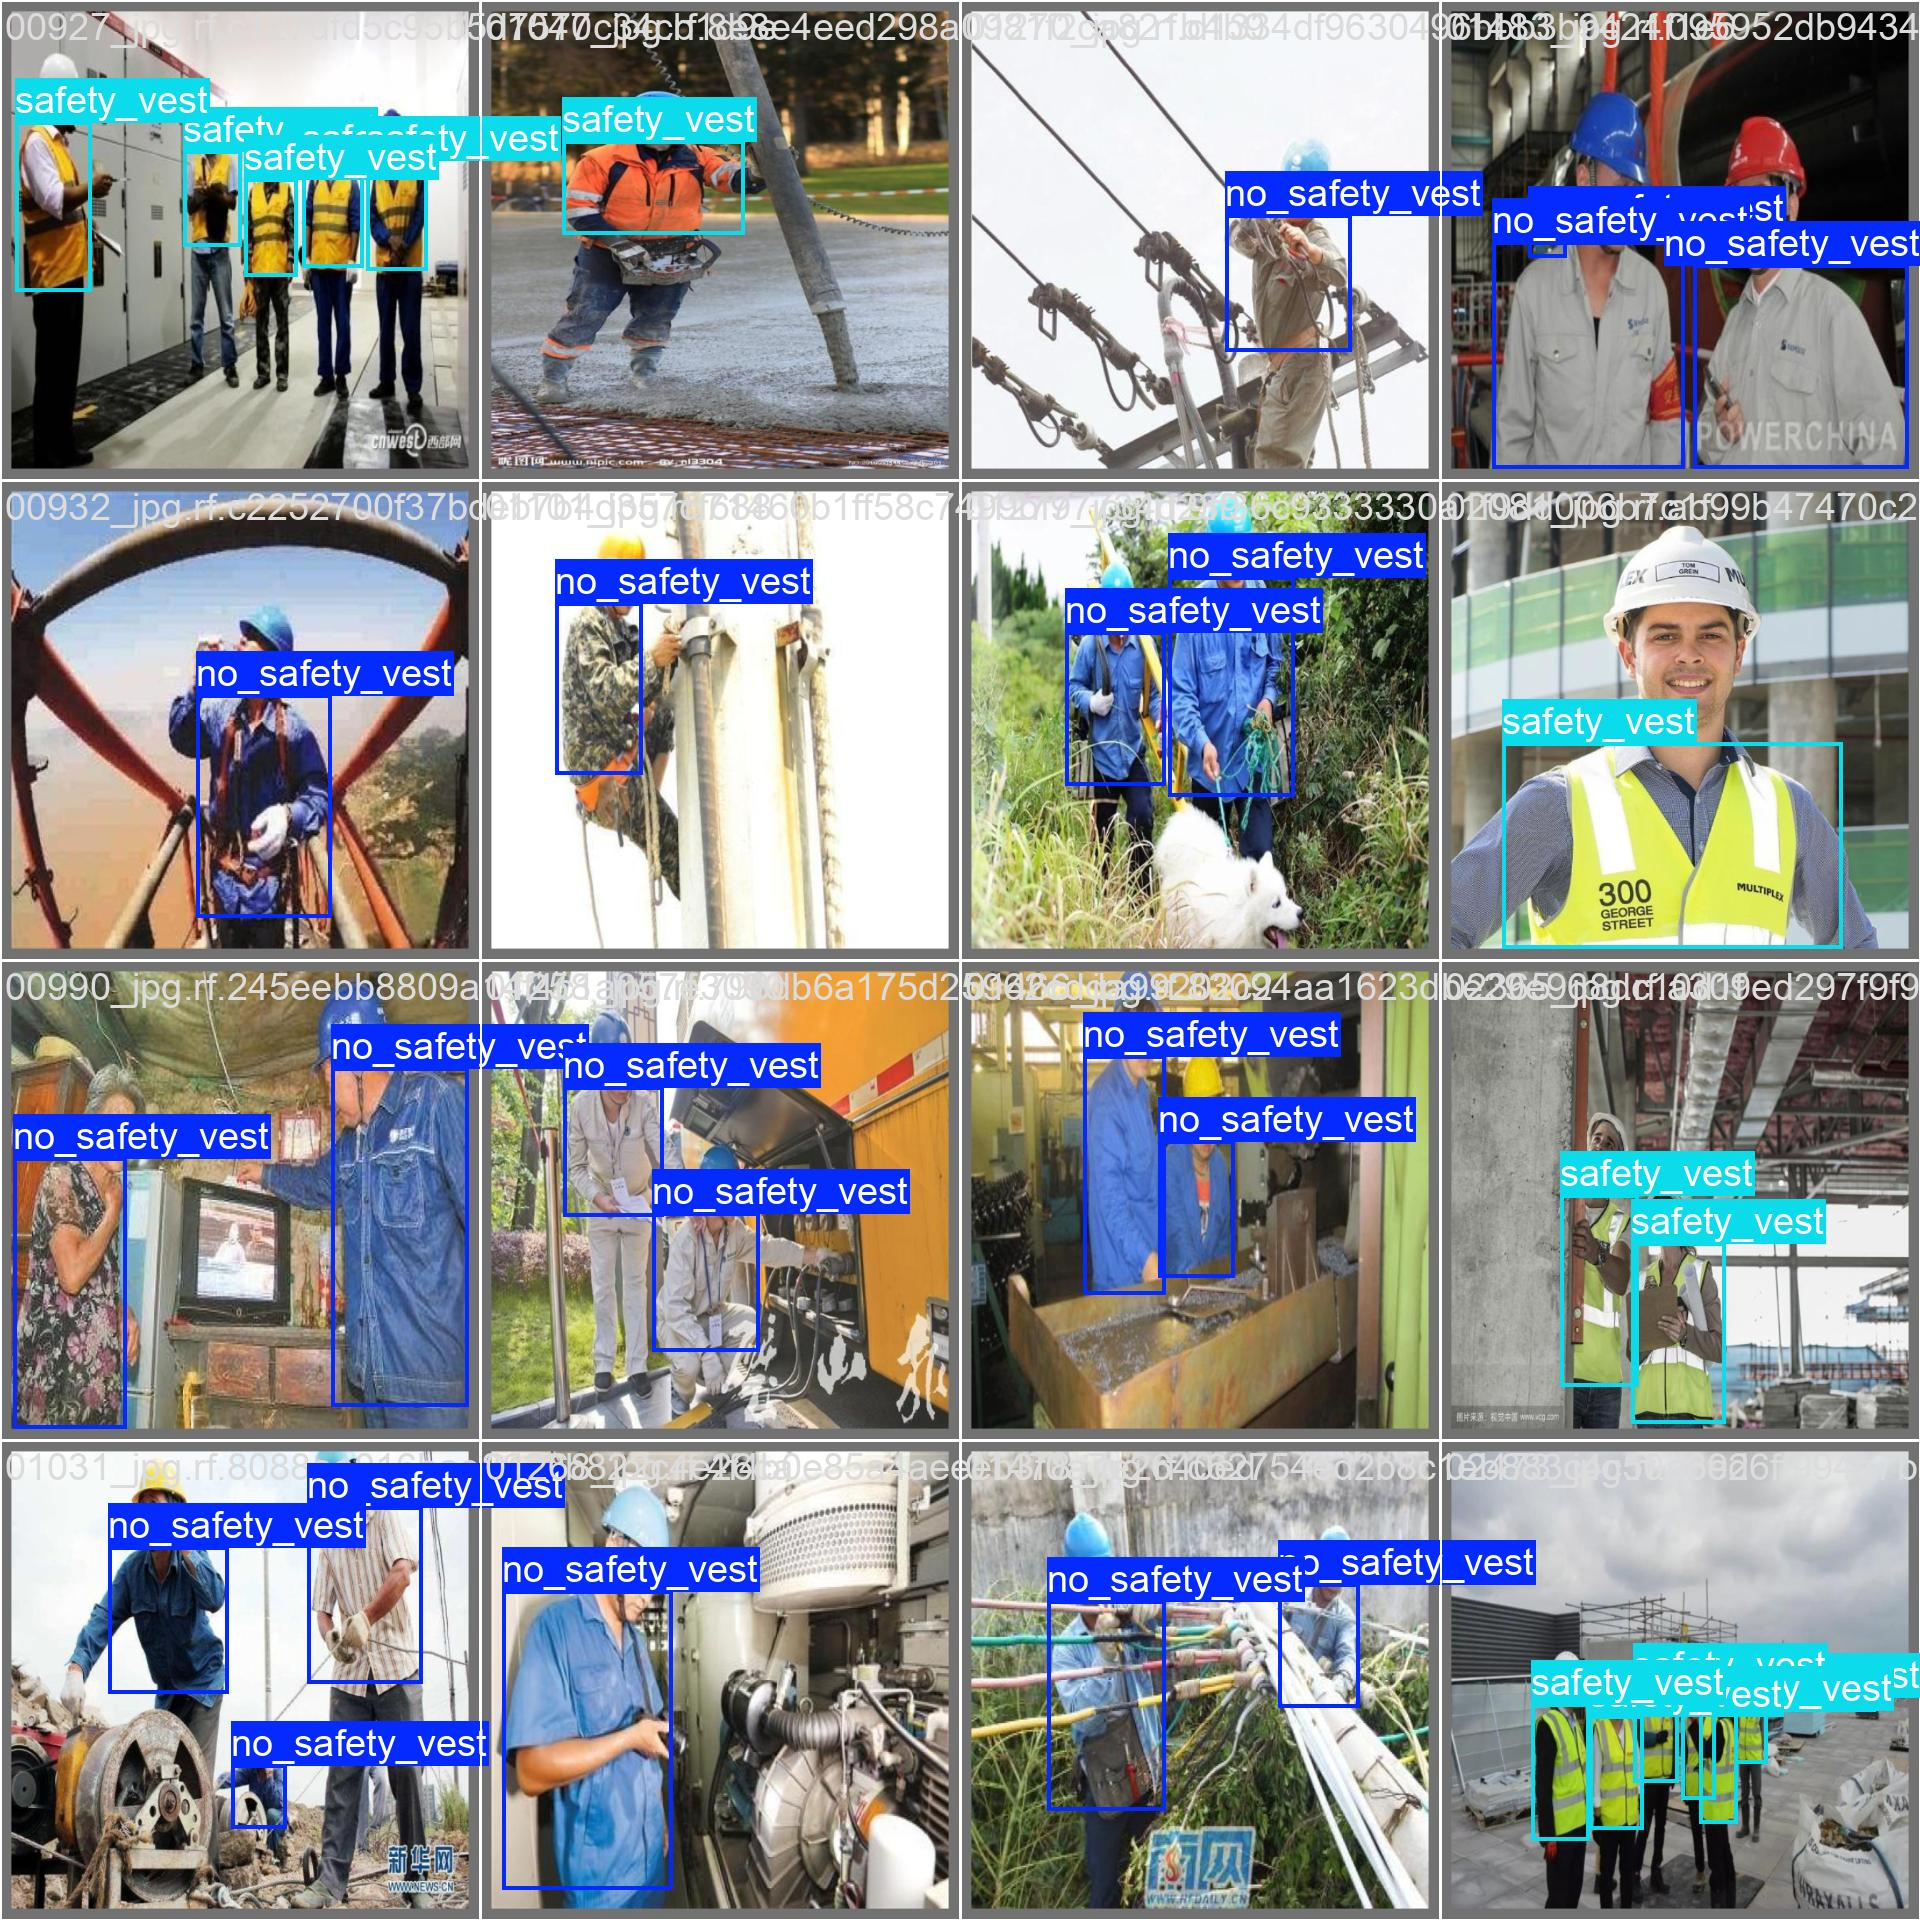

In [8]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=1000))

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=//kaggle/working/Safety-Vests-14/test/images

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.8.0+cpu CPU (AMD EPYC 7B13)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/390 //kaggle/working/Safety-Vests-14/test/images/000135_jpg.rf.dfa27899df8c30d344176f756f14c362.jpg: 640x640 1 no_safety_vest, 56.6ms
image 2/390 //kaggle/working/Safety-Vests-14/test/images/00345_jpg.rf.980f296b6b3ae23cf3c0bfd7ace54498.jpg: 640x640 1 no_safety_vest, 1 safety_vest, 41.9ms
image 3/390 //kaggle/working/Safety-Vests-14/test/images/00372_jpg.rf.6d93e1c4178ec8acd1894bd03acffdbb.jpg: 640x640 4 no_safety_vests, 40.5ms
image 4/390 //kaggle/working/Safety-Vests-14/test/images/00411_jpg.rf.6d5f81c48b1f78ad6c1707012d059bcc.jpg: 640x640 1 no_safety_vest, 2 safety_vests, 40.2ms
image 5/390 //kaggle/working/Safety-Vests-14/test/images/00446_jpg.rf.880cdf65a4b7abb7dfa6252e9601a0ce.jpg: 640x640 6 safety_vests, 40.1ms
image 6/390 //kaggle/working/Safety-Vests-14/test/images/00541_jpg.rf.ec64ca1c553bc94208828dd32bf92b46.jpg: 64

In [10]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg")[22:15]: #assuming JPG
    
        display(Image(filename=imageName))



In [9]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6573.4/8062.4 GB disk)
